In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
energy_dataset = pd.read_csv('../../data/energy_dataset.csv')
weather_features = pd.read_csv('../../data/weather_features.csv')
energy_dataset.tail()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89
35063,2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88


In [4]:
import datetime
import time


def convert_unix_time(time_str):
    date_time_obj = datetime.datetime.strptime(time_str, "%Y-%m-%d %H:%M:%S+%f:00")

    return time.mktime(date_time_obj.timetuple())

energy_dataset["time"] = energy_dataset["time"].apply(convert_unix_time)
weather_features["dt_iso"] = weather_features["dt_iso"].apply(convert_unix_time)

In [5]:
TWENTY_FOUR_HOURS = 86400
ONE_YEAR = 31536000
JAN_1_2015 = convert_unix_time("2015-01-01 17:00:00+01:00")

energy_df_filtered = pd.DataFrame(
    energy_dataset.loc[
        ((energy_dataset["time"] - JAN_1_2015) % TWENTY_FOUR_HOURS == 0)
        & (energy_dataset["time"] - JAN_1_2015 < ONE_YEAR)
    ]
)
energy_df_filtered = energy_df_filtered.reset_index(drop=True)
print(energy_df_filtered.shape)
energy_df_filtered.tail()

(365, 29)


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
360,1.451264e+09,439.0,0.0,0.0,3461.0,1307.0,228.0,0.0,0.0,0.0,...,182.0,0.0,9977.0,389.0,NaN,9905.0,23852.0,24452.0,31.55,42.57
361,1.451351e+09,440.0,0.0,0.0,3975.0,1976.0,370.0,0.0,0.0,0.0,...,173.0,0.0,11695.0,236.0,NaN,11881.0,31062.0,30011.0,42.98,54.14
362,1.451437e+09,403.0,249.0,0.0,4540.0,4051.0,374.0,0.0,0.0,0.0,...,178.0,0.0,5779.0,437.0,NaN,5824.0,30731.0,28855.0,52.10,62.31
363,1.451524e+09,414.0,0.0,0.0,3839.0,3180.0,385.0,0.0,0.0,0.0,...,145.0,0.0,9815.0,455.0,NaN,9696.0,29015.0,29026.0,45.01,55.22
364,1.451610e+09,361.0,0.0,0.0,5126.0,4034.0,308.0,0.0,0.0,0.0,...,114.0,0.0,2992.0,167.0,NaN,3112.0,26094.0,26141.0,56.70,65.97


In [6]:
weather_filtered = pd.DataFrame(
    weather_features.loc[
        ((weather_features["dt_iso"] - JAN_1_2015) % TWENTY_FOUR_HOURS == 0)
        & (weather_features["dt_iso"] - JAN_1_2015 < ONE_YEAR)
        & (weather_features["city_name"] == "Valencia")
    ]
)
weather_filtered = weather_filtered.reset_index(drop=True)
print(weather_filtered.shape)
weather_filtered.tail()

(366, 17)


,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
361,1.451264e+09,Valencia,285.44,283.71,288.15,1031,77,2,120,0.0,0.0,0.0,0,800,clear,sky is clear,01d
362,1.451351e+09,Valencia,286.32,284.82,289.15,1028,72,2,130,0.0,0.0,0.0,20,801,clouds,few clouds,02d
363,1.451437e+09,Valencia,288.63,285.93,293.15,1028,42,0,0,0.0,0.0,0.0,20,801,clouds,few clouds,02d
364,1.451524e+09,Valencia,288.30,284.82,293.15,1022,30,2,250,0.0,0.0,0.0,0,800,clear,sky is clear,01d
365,1.451610e+09,Valencia,287.15,285.37,290.15,1024,67,2,190,0.0,0.0,0.0,20,801,clouds,few clouds,02d


In [7]:
energy_weather_df = pd.concat(
    [
        energy_df_filtered["generation solar"],
        energy_df_filtered["generation wind onshore"],
        energy_df_filtered["generation nuclear"],
        energy_df_filtered["total load actual"],
        energy_df_filtered["price actual"],
        energy_df_filtered["time"],
        weather_filtered["temp"],
        weather_filtered["humidity"],
        weather_filtered["pressure"],
    ],
    axis=1,
)

<AxesSubplot:>

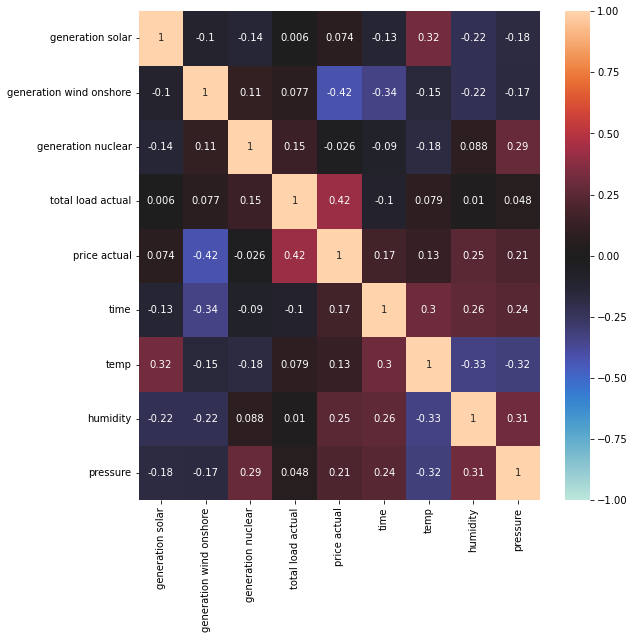

In [8]:
plt.figure(figsize=(9,9))
sns.heatmap(energy_weather_df.corr(), annot=True, vmin=-1, vmax=1, center=0)

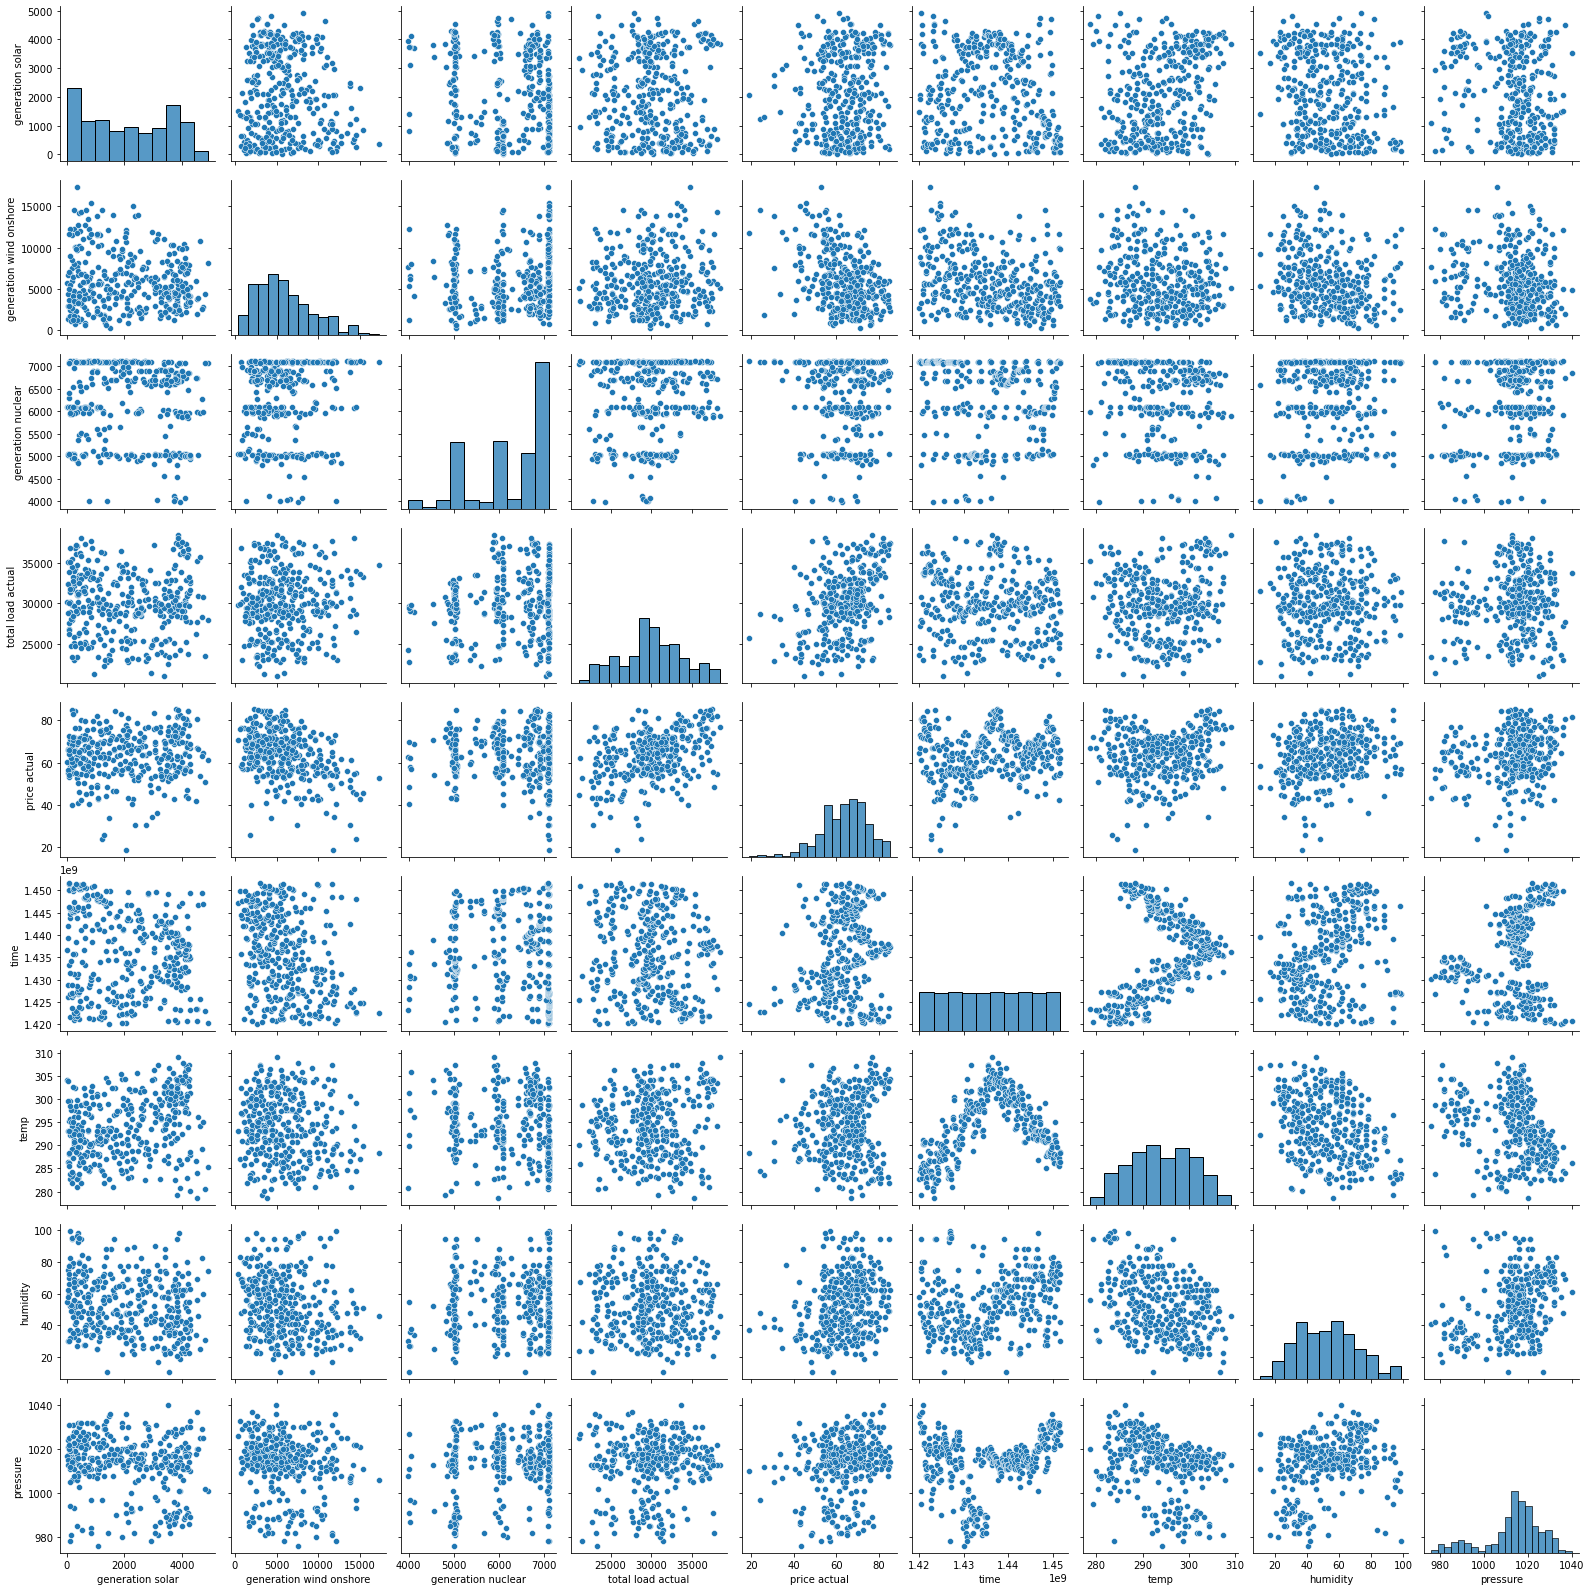

In [9]:
sns.pairplot(energy_weather_df)